<a href="https://colab.research.google.com/github/pawel0508/MachineLearningBootcamp_I/blob/master/GridSearch_Szukanie_po_Siatce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_moons 
import matplotlib.pyplot as plt
import plotly.express as px

sns.set(font_scale = 1.3)
np.random.seed(42)


In [22]:
raw_data = make_moons(n_samples = 2000, noise = 0.25, random_state = 42)
data = raw_data[0]
target = raw_data[1]

In [23]:
print(f'data: {data[:5]}')
print(f'target: {target[:5]}')

data: [[ 1.58230488  0.36687604]
 [ 0.32765354  0.98236569]
 [ 0.48826986 -0.2467652 ]
 [-0.93742051 -0.02942909]
 [ 0.63439695 -0.41222371]]
target: [1 0 1 0 1]


In [29]:
df = pd.DataFrame(
    data = np.c_[data, target], 
    columns = ['x1', 'x2', 'target']
)

df.head()


KeyError: ignored

Wizualizacja danych

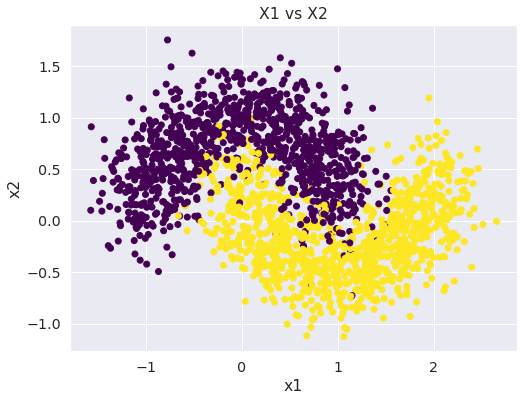

In [31]:
plt.figure(figsize = (8,6))
plt.scatter(df['x1'], df['x2'], c = target, cmap = 'viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('X1 vs X2')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target)

In [34]:
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (1500, 2)
x_test shape: (500, 2)
y_train shape: (1500,)
y_test shape: (500,)


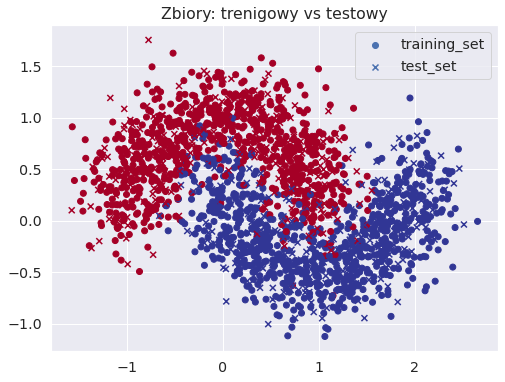

In [37]:
plt.figure(figsize = (8, 6))
plt.scatter(x_train[:,0], x_train[:,1], c = y_train, cmap='RdYlBu', label = 'training_set')
plt.scatter(x_test[:,0], x_test[:,1], c = y_test, cmap='RdYlBu', label = 'test_set', marker = 'x')
plt.title('Zbiory: trenigowy vs testowy')
plt.legend()
plt.show()

Wybór optymalnych paramterów grid_search

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier()

params = {'max_depth' : np.arange(1,10),
          'min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}

grid_search = GridSearchCV(classifier, param_grid = params, scoring = 'accuracy', cv = 5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
    

In [39]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 4}

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



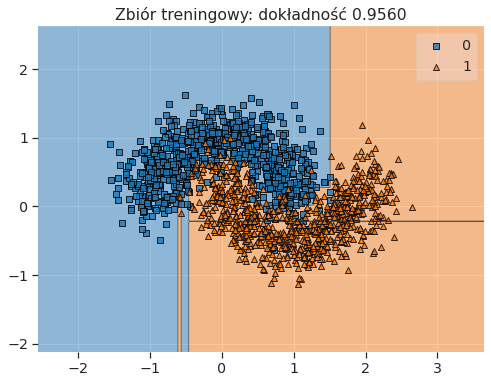

In [41]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (8,6))
plot_decision_regions(x_train, y_train, grid_search)
plt.title(f'Zbiór treningowy: dokładność {grid_search.score(x_train, y_train):.4f}')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



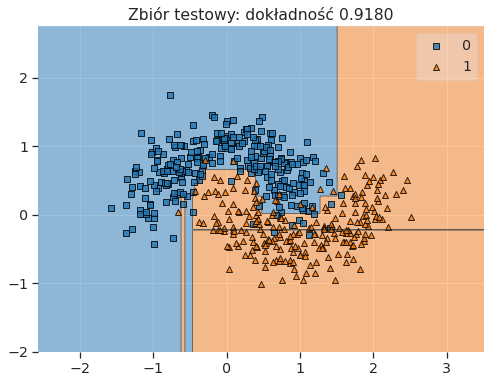

In [42]:
plt.figure(figsize = (8,6))
plot_decision_regions(x_test, y_test, grid_search)
plt.title(f'Zbiór testowy: dokładność {grid_search.score(x_test, y_test):.4f}')
plt.show()

In [51]:
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier(random_state=42)

param_grid = {'criterion' : ['gini', 'entropy'],
              'max_depth' : np.arange(1, 10),
              'min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}

grid_search = GridSearchCV(classifier, param_grid = params, n_jobs = -1, scoring = 'accuracy', cv = 5)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
        

In [52]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 3}

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



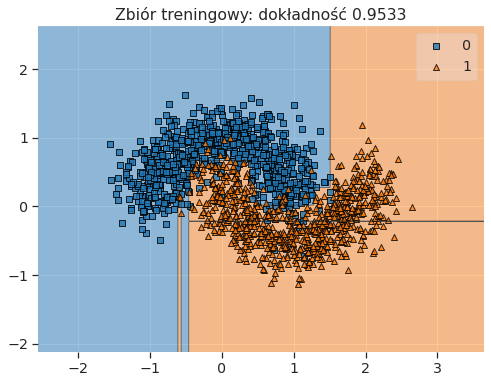

In [53]:
plt.figure(figsize = (8,6))
plot_decision_regions(x_train, y_train, grid_search)
plt.title(f'Zbiór treningowy: dokładność {grid_search.score(x_train, y_train):.4f}')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



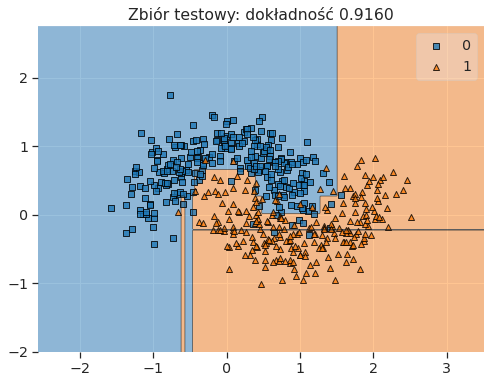

In [54]:
plt.figure(figsize = (8,6))
plot_decision_regions(x_test, y_test, grid_search)
plt.title(f'Zbiór testowy: dokładność {grid_search.score(x_test, y_test):.4f}')
plt.show()

In [55]:
classifier = DecisionTreeClassifier(random_state = 42)

param_grid = [
              {'criterion' : ['gini'], 'max_depth' : [1, 2, 3, 4, 5]},
              {'criterion' : ['entropy'], 'min_samples_leaf' : [2, 3, 4, 5]}
]

grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, n_jobs = -1, scoring = 'accuracy', cv = 5)


In [56]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'criterion': ['gini'], 'max_depth': [1, 2, 3, 4, 5]},
  

In [57]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5}

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



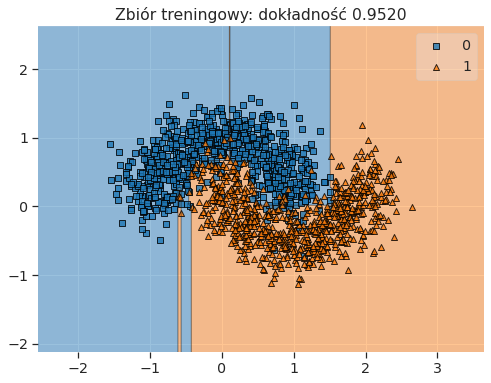

In [58]:
plt.figure(figsize = (8,6))
plot_decision_regions(x_train, y_train, grid_search)
plt.title(f'Zbiór treningowy: dokładność {grid_search.score(x_train, y_train):.4f}')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



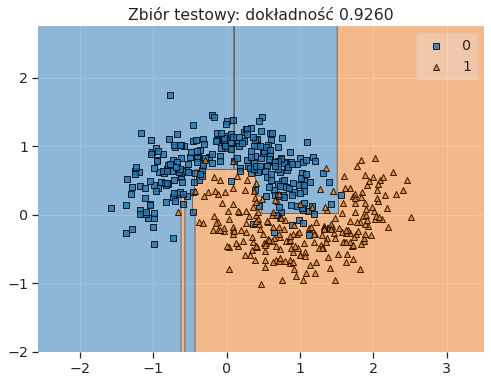

In [59]:
plt.figure(figsize = (8,6))
plot_decision_regions(x_test, y_test, grid_search)
plt.title(f'Zbiór testowy: dokładność {grid_search.score(x_test, y_test):.4f}')
plt.show()

In [64]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state = 42)

param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : np.arange(4, 10),
    'min_samples_leaf' : [4, 5, 6, 7, 8, 9, 10],
    'n_estimators' : [50]
}

grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, n_jobs = -1, scoring = 'accuracy', cv = 5)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [65]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 9,
 'n_estimators': 50}

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



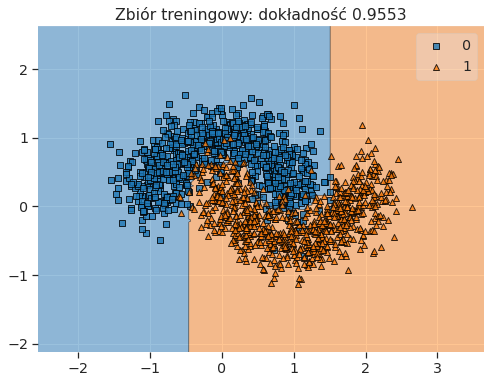

In [66]:
plt.figure(figsize = (8,6))
plot_decision_regions(x_train, y_train, grid_search)
plt.title(f'Zbiór treningowy: dokładność {grid_search.score(x_train, y_train):.4f}')
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



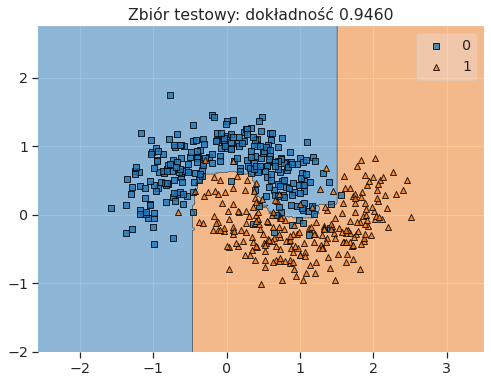

In [67]:
plt.figure(figsize = (8,6))
plot_decision_regions(x_test, y_test, grid_search)
plt.title(f'Zbiór testowy: dokładność {grid_search.score(x_test, y_test):.4f}')
plt.show()